In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

In [2]:
# 예시 데이터 만들기
np.random.seed(0)
data = np.random.normal(10, 2, 100)
df = pd.DataFrame(data, columns=['Feature'])

# 결측치를 만들기
df.loc[5:10, 'Feature'] = np.nan
df.loc[20:25, 'Feature'] = np.nan
df.loc[40:50, 'Feature'] = np.nan

In [3]:
df[20:25]

,Feature
20,NaN
21,NaN
22,NaN
23,NaN
24,NaN


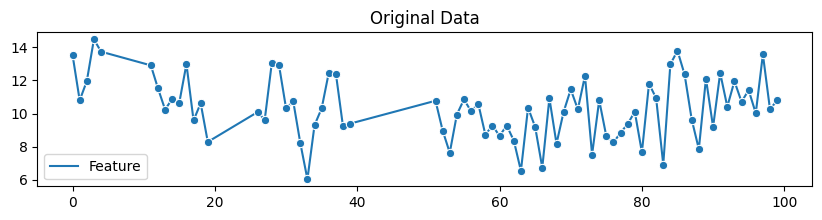

In [4]:
#원본 데이터 시각화
plt.figure(figsize=(10, 2))
sns.lineplot(data=df, marker='o')
plt.title('Original Data')
plt.show()

In [6]:
# 1. 1차 선형보간법, interpolate
df_linear = df.interpolate(method = 'linear') #1차 선형보간

# 2. 2차 선형보간법, interpolate
df_quadratic = df.interpolate(method = 'quadratic') #1차 선형보간

# 3. 평균 대치법
imputer_mean = SimpleImputer(strategy='mean')
df_mean = imputer_mean.fit_transform(df) #sklearn 제공하는 simpleimputer로 평균대치
df_mean = pd.DataFrame(df_mean, columns = ['Feature'])

# 4. 0값으로 대체
# fillna() 이 안에 원하는 값을 넣을 수 있다.
df_zero = df.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns = ['Feature'])

# 6. MICE 다중대치법
mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice = mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns = ['Feature'])

In [7]:
df_quadratic[20:25]

,Feature
20,6.398802
21,5.889974
22,6.765326
23,8.738796
24,10.094016


Text(0.5, 1.0, 'df_mice')

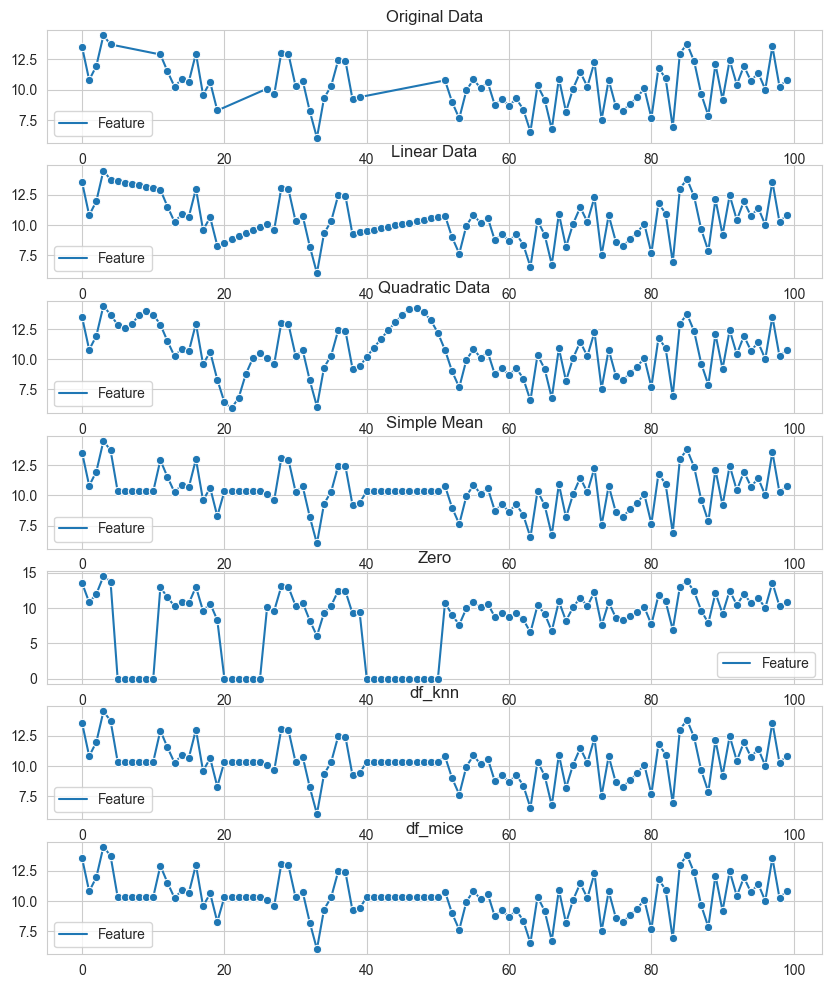

In [8]:
# 시각화를 통해서 어떤 식으로 변환하는지 확인
fig, axs = plt.subplots(7,1, figsize=(10, 12))
sns.lineplot(data= df, marker = 'o', ax=axs[0], legend='auto')
axs[0].set_title('Original Data')
sns.lineplot(data= df_linear, marker = 'o', ax=axs[1], legend='auto')
axs[1].set_title('Linear Data')
sns.lineplot(data= df_quadratic, marker = 'o', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic Data')
sns.lineplot(data= df_mean, marker = 'o', ax=axs[3], legend='auto')
axs[3].set_title('Simple Mean')
sns.lineplot(data= df_zero, marker = 'o', ax=axs[4], legend='auto')
axs[4].set_title('Zero')
sns.lineplot(data= df_knn, marker = 'o', ax=axs[5], legend='auto')
axs[5].set_title('df_knn')
sns.lineplot(data= df_mice, marker = 'o', ax=axs[6], legend='auto')
axs[6].set_title('df_mice')

- 결측치를 보간하고 -> 데이터 분석, 모델링을 하면서 나오는 평가지표로 성능을 비교할 수 있다.